# Lab Assignment Four: Multi-Layer Perceptron

In this lab, we will compare the performance of multi-layer perceptrons programmed via our own various implementations. We use a specific dataset chosen by instructor, the US census dataset is available from Kaggle. The objective of the classification is to predict, for each country, what the child poverty rate will be. we will convert this from regression to four levels of classification by quantizing the variable of interest.

Dataset:https://www.kaggle.com/muonneutrino/us-census-demographic-data

# 1.0 Load, Split, and Balance
  *Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.*

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.special import expit
import sys
import missingno as mn
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, f1_score
from sklearn import preprocessing

#Load the data into memory and save it to a pandas data frame
df = pd.read_csv('C://Users//ethan//Downloads//acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


<Axes: >

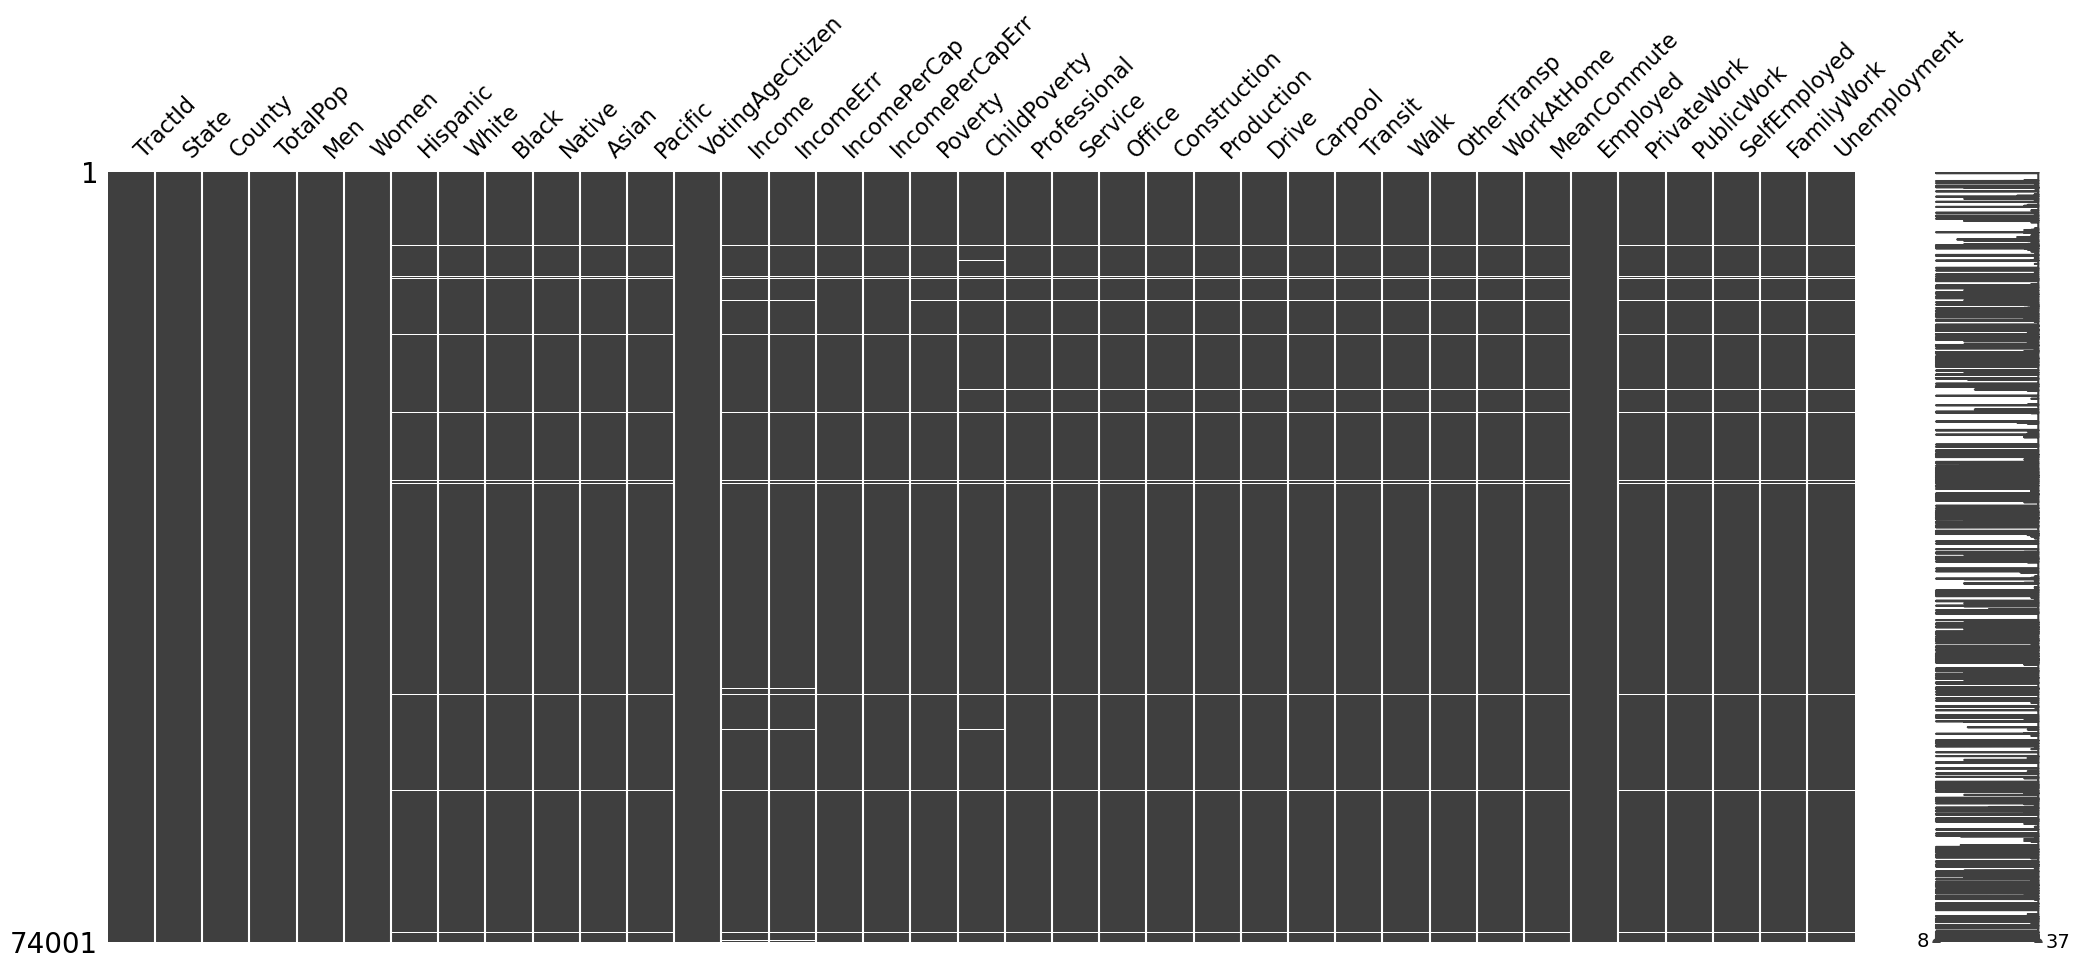

In [107]:
# Use the missingno to directly find missing data in the dataset

mn.matrix(df)

White lines in the visualization shows missing data in the dataset. We will now any observations that having missing data.

After removing the missing data, we checked to ensure that all the missing data has indeed been removed

In [108]:

df = df.dropna()
df.isna().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [109]:
# Check for duplicates
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

We can confirm that all the missing data has been removed. We also checked for any possible duplicates as well, and we have found no duplicate data.

*Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.*

There are two non-numerical variables in the dataset called State and County. We have decided to transform both County and State to integer type by preprocessing the data using sklearn. We decided to keep the County data because we felt that it can provide more specific detail about where in the state these statistics occur.

In [110]:
le = preprocessing.LabelEncoder()
df.State = le.fit_transform(df.State)
df.State
lf = preprocessing.LabelEncoder()
df.County = lf.fit_transform(df.County)
df.County

0          89
1          89
2          89
3          89
4          89
         ... 
73996    1938
73997    1938
73998    1938
73999    1938
74000    1938
Name: County, Length: 72718, dtype: int32

In [111]:
print(len(list(le.classes_)))
print(list(le.classes_))
print(len(list(lf.classes_)))
print(list(lf.classes_))

52
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
1954
['Abbeville County', 'Acadia Parish', 'Accomack County', 'Ada County', 'Adair County', 'Adams County', 'Addison County', 'Adjuntas Municipio', 'Aguada Municipio', 'Aguadilla Municipio', 'Aguas Buenas Municipio', 'Aibonito Municipio', 'Aiken County', 'Aitkin County', 'Alachua County', 'Alamance County', 'Alameda County', 'Alamosa

We can see from the above that there are 52 states, and 1954 counties.

In [112]:
# Checking dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  int32  
 2   County            72718 non-null  int32  
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

Both State and County have been converted to int64

# 1.1 Balance the dataset
*Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.*


In [113]:
df['ChildPoverty'].describe()

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

The ChildPoverty variable has min, 25%, 50%, 75%, and max, so we can use 0 for low poverty, 1 for average poverty, 2 for high poverty, and 3 for very high poverty

In [114]:
df['ChildPovertyLevel'] =  pd.qcut(df.ChildPoverty, 4, labels=['0','1','2','3'])

[18229 18171 18148 18170]


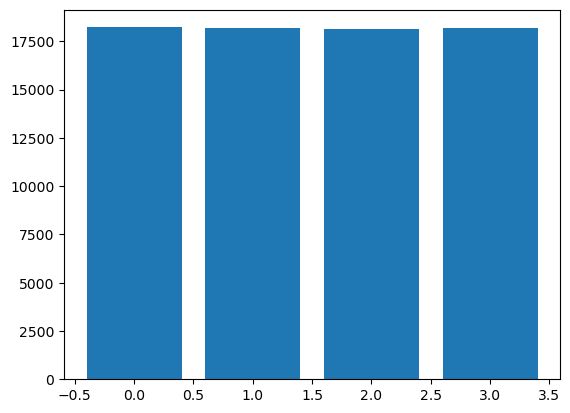

In [115]:
target =  df['ChildPovertyLevel']
target_names = 'ChildPovertyLevel'
y = target
y = y.astype(int)
vals = np.bincount(y)
print(vals)
plt.bar(range(len(vals)),vals)
plt.show()

From the visualization above, we can see that the four classes have very similar numbers, and is now balanced. Each class has 18229, 18171, 18148, and 18170 instances.

*Should the balancing of the dataset be done for both the training and testing set? Explain.*

We believe that balancing the dataset for both the training and testing dataset should be done because we want the ChildPovertyLevel to be balanced. If the balanced data is not used, our prediction would be inaccurate, so we need to use the balanced data and split a new training and testing dataset.

#1.2 Split the dataset

*Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.*

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df1 = df.drop("ChildPovertyLevel",axis=1)
df2 = df1.drop(["ChildPoverty","TractId"], axis=1 )

X = df2.values
y = np.array(y)

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72718, 35)
(72718,)
(58174, 35)
(58174,)
(14544, 35)
(14544,)


# 2.0 Preprocessing and Initial Modeling

*You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.*

In [257]:
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)

        return W1, W2, b1, b2
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)


    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

In [335]:
# now let's add in the following functions:
#    feedforward
#    fit and predict
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred


    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)

            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2


        return self


class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C

        return gradW1, gradW2


# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter = 10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                      )

                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2


            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))

        return self

In [336]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradW2 = V2 @ A2.T
        gradW1 = V1[1:, :] @ A1.T  # Excluding bias term from backpropagation

        # Regularize weights (excluding bias terms)
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C

        return gradW1, gradW2

According to https://mmuratarat.github.io/2019-02-25/xavier-glorot-he-weight-init, the sigmoid formula for Glorot initialization is r = 4 * square root of (6 / n.output + n.input)

In [337]:

class GlorotInitial (TLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))

        # https://mmuratarat.github.io/2019-02-25/xavier-glorot-he-weight-init
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1))

        return W1, W2

In [338]:
%%time

vals = {'n_hidden':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn = GlorotInitial(**vals)

nn.fit(X_train, y_train, print_progress=1)
yhat = nn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

Epoch: 100/100

Accuracy: 0.2544004400440044
CPU times: total: 2min 41s
Wall time: 40.7 s


Graphing loss function versus the number of epochs

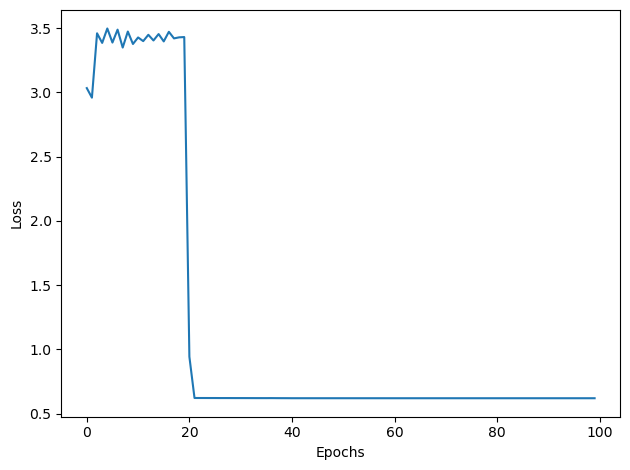

In [377]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# 2.1
*Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.*

In [95]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)
y_train1 = y_train
y_test1 = y_test
print(np.min(X_train1),np.max(X_train1))
print(np.min(X_test1),np.max(X_test1))
print(np.unique(y_train))

-7.76168922311812 69.14046361056973
-7.297223878460913 44.929363427550534
[0 1 2 3]


In [340]:
%%time

vals = {'n_hidden':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn2 = GlorotInitial(**vals)

nn2.fit(X_train1, y_train1, print_progress=1)
yhat2 = nn2.predict(X_test1)
print('Accuracy:',accuracy_score(y_test1,yhat2))

Epoch: 100/100

Accuracy: 0.7286853685368537
CPU times: total: 60 s
Wall time: 15.1 s


Graphing loss function versus the number of epochs

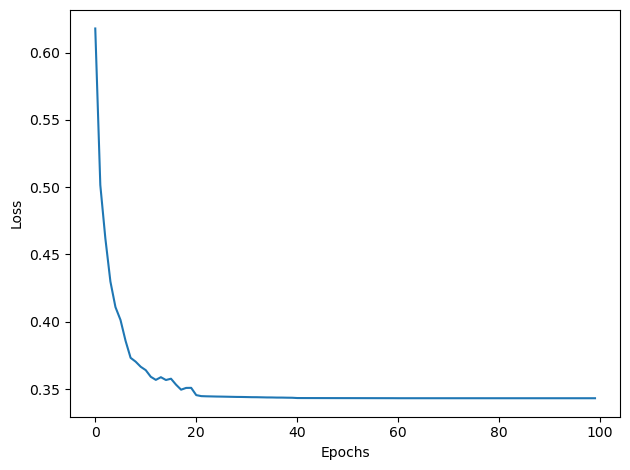

In [378]:
plt.plot(range(len(nn2.cost_)), nn2.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# 2.2

*Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.*

In [121]:
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,ChildPovertyLevel
0,1001020100,0,89,1845,899,946,2.4,86.3,5.2,0.0,...,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6,2
1,1001020200,0,89,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4,3
2,1001020300,0,89,3385,1533,1852,8.0,61.4,26.5,0.6,...,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7,2
3,1001020400,0,89,4267,2001,2266,9.6,80.3,7.1,0.5,...,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1,0
4,1001020500,0,89,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3,2


In [122]:
state_dummies = pd.get_dummies(df['State'], prefix = 'State')


In [123]:
county_dummies = pd.get_dummies(df['County'], prefix='County')


In [124]:
dfDummies = pd.concat([state_dummies, county_dummies], axis=1)


In [125]:
df2 = df2.drop(['State', 'County'], axis=1)
df3 = pd.concat([dfDummies, df2], axis=1)
df3.head()

,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,True,False,False,False,False,False,False,False,False,False,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,True,False,False,False,False,False,False,False,False,False,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,True,False,False,False,False,False,False,False,False,False,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,True,False,False,False,False,False,False,False,False,False,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,True,False,False,False,False,False,False,False,False,False,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [126]:
df3 = df3.astype(float)
df3.head()

,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,2.1,24.5,881.0,74.2,21.2,4.5,0.0,4.6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,22.2,852.0,75.9,15.0,9.0,0.0,3.4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.8,1.5,23.1,1482.0,73.3,21.1,4.8,0.7,4.7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,2.9,2.1,25.9,1849.0,75.8,19.7,4.5,0.0,6.1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.3,0.7,21.0,4787.0,71.4,24.1,4.5,0.0,2.3


In [127]:
X3 = df3.values
y = np.array(y)
print(X3.shape)
print(y.shape)
X3 = StandardScaler().fit(X3).transform(X3)
X3 = preprocessing.normalize(X3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3,y,test_size = 0.2)

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(72718, 2039)
(72718,)
(58174, 2039)
(58174,)
(14544, 2039)
(14544,)


In [342]:
%%time

vals = {'n_hidden':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn3 = GlorotInitial(**vals)

nn3.fit(X_train2, y_train2, print_progress=1)
yhat3 = nn3.predict(X_test2)
print('Accuracy:',accuracy_score(y_test2,yhat3))

Epoch: 100/100

Accuracy: 0.5877337733773378
CPU times: total: 14min 15s
Wall time: 4min 22s


Graphing loss function versus the number of epochs

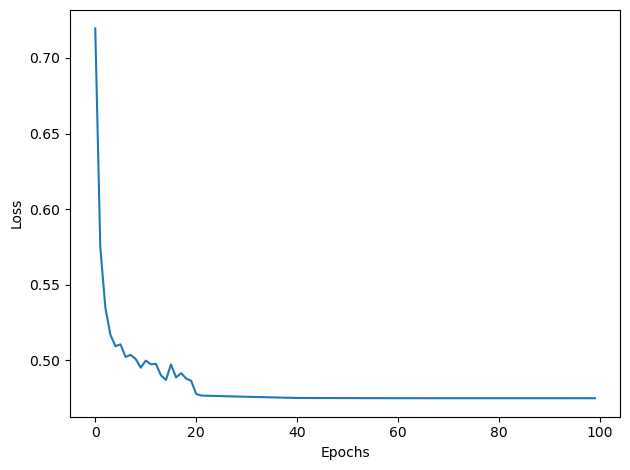

In [379]:

plt.plot(range(len(nn3.cost_)), nn3.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

The accuracy is lower than just normalization, most likely because we kept the County information, which increases the number of features neaded by a lot. Next, we will remove the County information and only one hot encode the State information

In [129]:
df3.head()

,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,2.1,24.5,881.0,74.2,21.2,4.5,0.0,4.6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,22.2,852.0,75.9,15.0,9.0,0.0,3.4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.8,1.5,23.1,1482.0,73.3,21.1,4.8,0.7,4.7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,2.9,2.1,25.9,1849.0,75.8,19.7,4.5,0.0,6.1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.3,0.7,21.0,4787.0,71.4,24.1,4.5,0.0,2.3


In [132]:
df3 = df3.filter(regex='^(?!County_).*$')
df3.head()

,State_0,State_1,State_2,State_3,State_4,State_5,State_6,State_7,State_8,State_9,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,2.1,24.5,881.0,74.2,21.2,4.5,0.0,4.6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,22.2,852.0,75.9,15.0,9.0,0.0,3.4
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.8,1.5,23.1,1482.0,73.3,21.1,4.8,0.7,4.7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,2.9,2.1,25.9,1849.0,75.8,19.7,4.5,0.0,6.1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.3,0.7,21.0,4787.0,71.4,24.1,4.5,0.0,2.3


In [133]:
X4 = df3.values
y = np.array(y)
print(X4.shape)
print(y.shape)
X4 = StandardScaler().fit(X4).transform(X4)
X4 = preprocessing.normalize(X4)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X4,y,test_size = 0.2)

print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(72718, 85)
(72718,)
(58174, 85)
(58174,)
(14544, 85)
(14544,)


In [136]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_0           72718 non-null  float64
 1   State_1           72718 non-null  float64
 2   State_2           72718 non-null  float64
 3   State_3           72718 non-null  float64
 4   State_4           72718 non-null  float64
 5   State_5           72718 non-null  float64
 6   State_6           72718 non-null  float64
 7   State_7           72718 non-null  float64
 8   State_8           72718 non-null  float64
 9   State_9           72718 non-null  float64
 10  State_10          72718 non-null  float64
 11  State_11          72718 non-null  float64
 12  State_12          72718 non-null  float64
 13  State_13          72718 non-null  float64
 14  State_14          72718 non-null  float64
 15  State_15          72718 non-null  float64
 16  State_16          72718 non-null  float64
 17

In [343]:
%%time

vals = {'n_hidden':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn4 = GlorotInitial(**vals)

nn4.fit(X_train3, y_train3, print_progress=1)
yhat4 = nn4.predict(X_test3)
print('Accuracy:',accuracy_score(y_test3,yhat4))

Epoch: 100/100

Accuracy: 0.6668729372937293
CPU times: total: 1min 20s
Wall time: 20.5 s


Graphing loss function versus the number of epochs

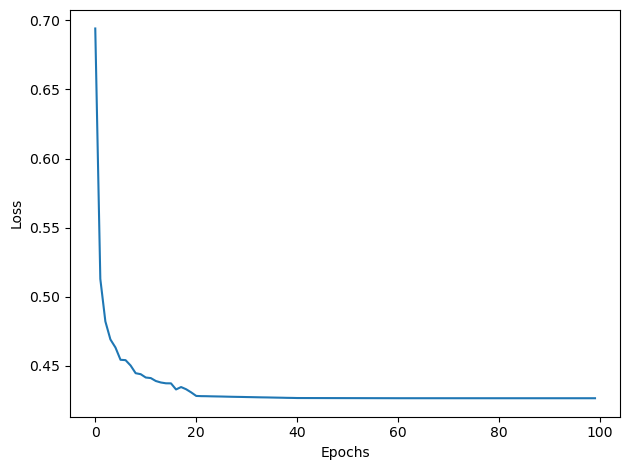

In [380]:

plt.plot(range(len(nn4.cost_)), nn4.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

As you can see, by elminating the County column, we were able to improve accuracy and runtime.

# 2.3

*Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.*

Model 1 Accuracy: 0.2544004400440044
Model 2 Accuracy: 0.7286853685368537
Model 3 Accuracy: 0.5877337733773378
Model 3 (Removed County) Accuracy: 0.6668729372937293


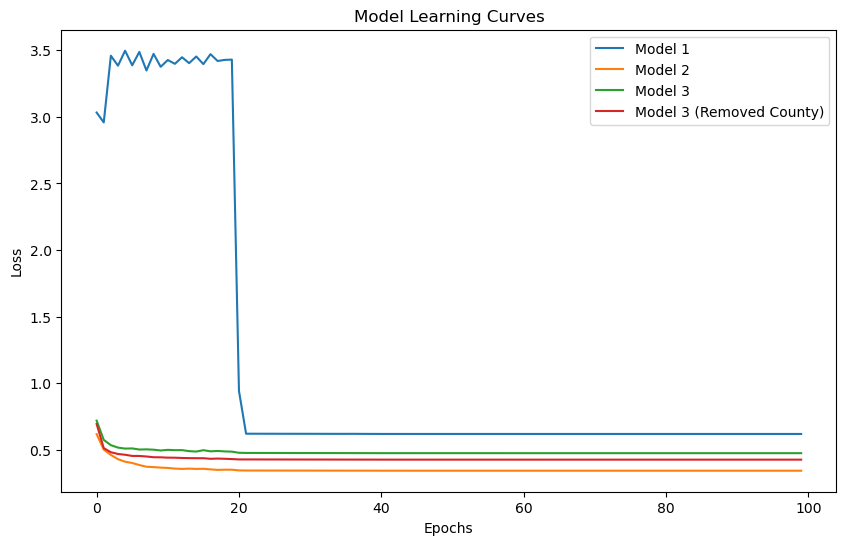

In [381]:
accuracies = []
accuracies.append(accuracy_score(y_test, nn.predict(X_test)))
accuracies.append(accuracy_score(y_test1, nn2.predict(X_test1)))
accuracies.append(accuracy_score(y_test2, nn3.predict(X_test2)))
accuracies.append(accuracy_score(y_test3, nn4.predict(X_test3)))

print("Model 1 Accuracy:", accuracies[0])
print("Model 2 Accuracy:", accuracies[1])
print("Model 3 Accuracy:", accuracies[2])
print("Model 3 (Removed County) Accuracy:", accuracies[3])

# Plotting the loss over epochs for each model
plt.figure(figsize=(10, 6))
plt.plot(nn.cost_, label='Model 1')
plt.plot(nn2.cost_, label='Model 2')
plt.plot(nn3.cost_, label='Model 3')
plt.plot(nn4.cost_, label='Model 3 (Removed County)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Learning Curves')
plt.show()

Looking at all three models and their accuracy scores, it is clear that Model 2 has the best performance, meaning that we should only apply normalization to the data matrix. This is because normalization changes variables to a common sclare or range, eliminating differneces in units or distributions, leading to more efficiency when running. One hot encoding had better performance than no normalization, but worse performance than normalization, probably because of the larger number of features that are used, which impacts performance. This is most likely because we chose to keep the County data as well instead of removing it. In order to test this, we removed the County data and only kept the one hot encoded state data, which resulted in improved accuracy. The worst performance happens in Model 1 because we did not apply any normalization or encoding to it.

In addition, Model 2 has the best loss vesus epoch ratio compared to all the other models, while Model 1 has the worst.

# 3.0 Modeling


Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

From now on, we will be using the normalized and one hot encoded dataset with removed County information for the rest of the program

# 3.1 Adding a 3rd layer

Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.
Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

We have chosen to use the average absolute values for magnitude calculation.

In [297]:
class ThreeLayerPerceptronBase(object):
    def __init__(self, n_hidden_1=30, n_hidden_2=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        """Added a container for the number of units in the extra hidden layer"""
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) # reshape to be W

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden_2 + 1)


        return W1, W2, W3

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        """Including the mean of the new added third layer"""
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))

    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3) #notice the new function input referring to the new layer
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4   
        
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass



    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

In [298]:
class ThreeLayerPerceptronVectorized(ThreeLayerPerceptronBase):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4 - Y_enc)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3[:, 1:].T @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2[:, 1:].T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T


        # regularize weights that are not bias terms
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C
        
        
        return gradW1, gradW2, gradW3

In [360]:
class ThreeLayerMiniBatch(ThreeLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

        # Initialize gradient storage as a dictionary for each layer
        self.gradient_storage = {'W1': [], 'W2': [], 'W3': []}

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum

        # Initializing containers of the average weight for each epoch
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)

        self.cost_ = []
        self.score_ = []
        # get starting accuracy
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # keep track of validation, if given 
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))
            self.val_cost_ = []

        for i in range(self.epochs):
            eta = self.eta

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                # Feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                              self.W1,
                                                              self.W2,
                                                              self.W3,
                                                              )

                cost = self._cost(A4, Y_enc[:, idx], self.W1, self.W2, self.W3)
                mini_cost.append(cost)  # Appends cost of mini-batch only 

                # Compute gradient via backpropagation 
                gradW1, gradW2, gradW3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3,
                                                                                    Y_enc=Y_enc[:, idx],
                                                                                    W1=self.W1, W2=self.W2, W3=self.W3)

                # Store the absolute mean of the gradients in the dictionary
                self.gradient_storage['W1'].append(np.abs(gradW1).mean())
                self.gradient_storage['W2'].append(np.abs(gradW2).mean())
                self.gradient_storage['W3'].append(np.abs(gradW3).mean())

                # Weight updates
                rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3

            # After processing all mini-batches for the epoch, calculate the mean absolute gradient for each layer
            self.grad_w1_[i] = np.mean(self.gradient_storage['W1'][-len(mini):])
            self.grad_w2_[i] = np.mean(self.gradient_storage['W2'][-len(mini):])
            self.grad_w3_[i] = np.mean(self.gradient_storage['W3'][-len(mini):])

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        # Plotting the average gradient magnitude for each epoch - plot using the updated storage method
        ax = plt.subplot(1, 1, 1)
        plt.plot(abs(self.grad_w1_), label='Layer 1')
        plt.plot(abs(self.grad_w2_), label='Layer 2')
        plt.plot(abs(self.grad_w3_), label='Layer 3')
        plt.legend()
        plt.ylabel('Absolute average gradient magnitude')
        plt.xlabel('Epochs')
        plt.show()

        return self


In [361]:
class ThreeLayerMiniBatchCrossEntropy(ThreeLayerMiniBatch):
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4 - Y_enc)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3[:, 1:].T @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2[:, 1:].T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T


        # regularize weights that are not bias terms
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C


        return gradW1, gradW2, gradW3

In [362]:
class ThreeLayerGlorotInitialize(ThreeLayerMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_2 + 1))
        
        return W1, W2, W3

In [363]:
vals_new = {'n_hidden_1':50, 'n_hidden_2':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

Epoch: 100/100

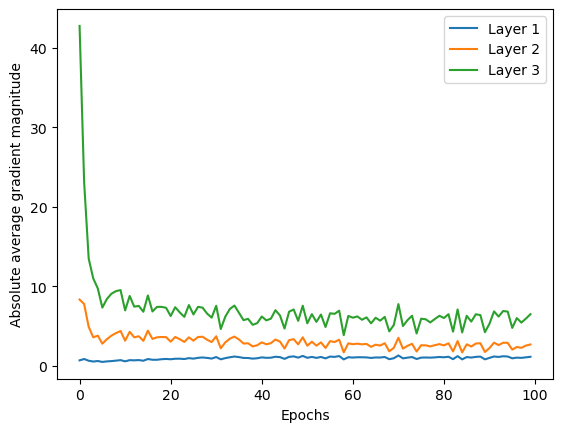

Accuracy: 0.7277227722772277


In [364]:
nn3layer = ThreeLayerGlorotInitialize(**vals_new)
clf = nn3layer.fit(X_train3, y_train3, print_progress=1)
yhat3layer = nn3layer.predict(X_test3)
print('Accuracy:',accuracy_score(y_test3,yhat3layer))

Graphing loss function versus the number of epochs

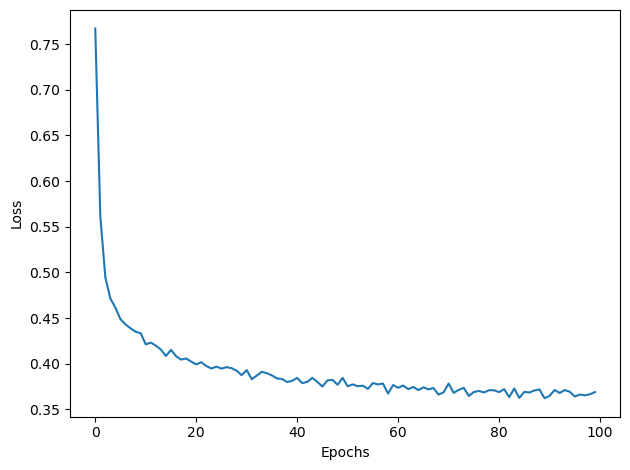

In [382]:
plt.plot(range(len(nn3layer.cost_)), nn3layer.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# 3.2 Add support for a fourth layer

In [366]:
class FourLayerPerceptronBase(object):
    def __init__(self, n_hidden_1=30, n_hidden_2=30, n_hidden_3=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        """Added a container for the number of units in the extra hidden layer"""
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W

        """Initializing the weights for the second layer"""

        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) # reshape to be W

        """Initializing the weights for the third layer"""

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_hidden_3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden_3, self.n_hidden_2 + 1) # reshape to be W

        W4_num_elems = (self.n_hidden_3 + 1)*self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_hidden_3 + 1)

        return W1, W2, W3, W4

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        """Including the mean of the new added third layer"""
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))

    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A5)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4) #notice the new function input referring to the new layer
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

In [367]:
class FourLayerPerceptronVectorized(FourLayerPerceptronBase):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = -2 * (Y_enc - A5) * A5 * (1 - A5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer

        # regularize weights that are not bias terms
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C

        return gradW1, gradW2, gradW3, gradW4

In [368]:
class FourLayerMiniBatch(FourLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

        # Initialize gradient storage as a dictionary for each layer
        self.gradient_storage = {'W1': [], 'W2': [], 'W3': [], 'W4': []}

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data with mini-batch """
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Init weights and setup matrices 
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4 = self._initialize_weights()

        # Initializing containers for the average gradient for each epoch
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum

        self.cost_ = []
        self.score_ = [accuracy_score(y_data, self.predict(X_data))]
        
        # Validation setup
        if XY_test is not None:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test, self.predict(X_test))]
            self.val_cost_ = []

        for i in range(self.epochs):
            eta = self.eta

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                # Feedforward 
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                      )
                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                mini_cost.append(cost)  # Appends cost of mini-batch only 

                gradW1, gradW2, gradW3, gradW4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4)

                # Store the absolute mean of the gradients in the dictionary
                self.gradient_storage['W1'].append(np.abs(gradW1).mean())
                self.gradient_storage['W2'].append(np.abs(gradW2).mean())
                self.gradient_storage['W3'].append(np.abs(gradW3).mean())
                self.gradient_storage['W4'].append(np.abs(gradW4).mean())

                rho_W1, rho_W2, rho_W3, rho_W4  = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4

            # After processing all mini-batches for the epoch, calculate the mean absolute gradient for each layer
            self.grad_w1_[i] = np.mean(self.gradient_storage['W1'][-len(mini):])
            self.grad_w2_[i] = np.mean(self.gradient_storage['W2'][-len(mini):])
            self.grad_w3_[i] = np.mean(self.gradient_storage['W3'][-len(mini):])
            self.grad_w4_[i] = np.mean(self.gradient_storage['W4'][-len(mini):])

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        # Plotting the average gradient magnitude for each epoch - plot using the updated storage method
        plt.subplot(1, 1, 1)
        plt.plot(self.grad_w1_, label='Layer 1')
        plt.plot(self.grad_w2_, label='Layer 2')
        plt.plot(self.grad_w3_, label='Layer 3')
        plt.plot(self.grad_w4_, label='Layer 4')
        plt.legend()
        plt.ylabel('Absolute average gradient magnitude')
        plt.xlabel('Epochs')
        plt.show()

        return self


In [369]:
class FourLayerMiniBatchCrossEntropy(FourLayerMiniBatch):
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5)+(1-Y_enc)*np.log(1-A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = -2 * (Y_enc - A5) * A5 * (1 - A5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer

        # regularize weights that are not bias terms
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C

        return gradW1, gradW2, gradW3, gradW4

In [370]:
class FourLayerGlorotInitialize(FourLayerMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_3 + self.n_hidden_2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_3, self.n_hidden_2 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_3))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_3 + 1))

        
        return W1, W2, W3, W4

Epoch: 100/100

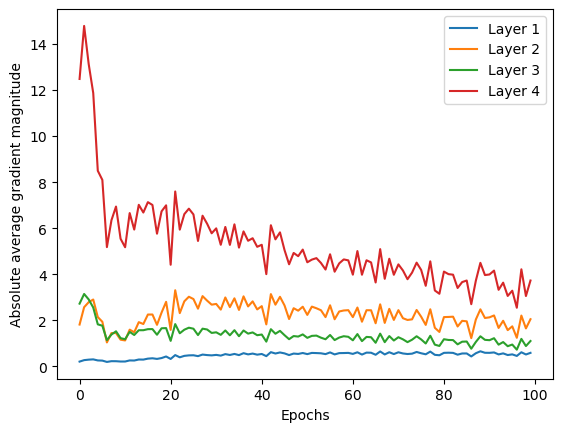

Accuracy: 0.7142464246424642


In [371]:
vals4layer = {'n_hidden_1':50, 'n_hidden_2':50, 'n_hidden_3':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn4layer = FourLayerGlorotInitialize(**vals4layer)
nn4layer.fit(X_train3, y_train3, print_progress=1)
yhat4layer = nn4layer.predict(X_test3)
print('Accuracy:',accuracy_score(y_test3,yhat4layer))

Graphing loss function versus the number of epochs

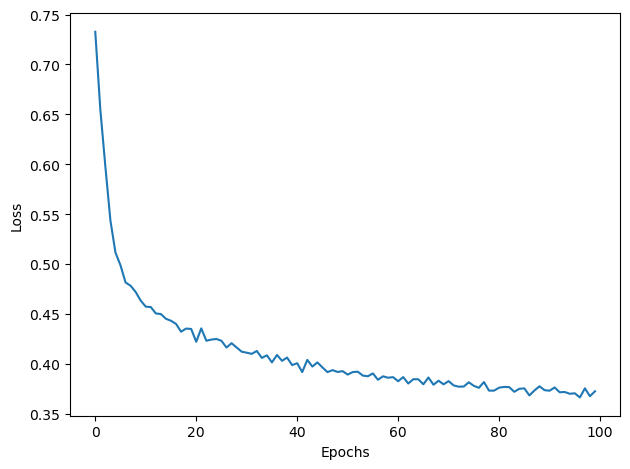

In [383]:
plt.plot(range(len(nn4layer.cost_)), nn4layer.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# 3.3 Adding support for a fifth layer

In [312]:
class FiveLayerPerceptronBase(object):
    def __init__(self, n_hidden_1=30, n_hidden_2=30, n_hidden_3=30, n_hidden_4=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.n_hidden_4 = n_hidden_4
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W

        """Initializing the weights for the second layer"""

        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) # reshape to be W

        """Initializing the weights for the third layer"""

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_hidden_3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden_3, self.n_hidden_2 + 1) # reshape to be W

        """Initializing the weights for the fourth layer"""

        W4_num_elems = (self.n_hidden_3 + 1)*self.n_hidden_4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden_4, self.n_hidden_3 + 1) # reshape to be W

        """Initializing the weights for the fifth layer"""

        W5_num_elems = (self.n_hidden_4 + 1)*self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden_4 + 1)

        return W1, W2, W3, W4, W5

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        """Including the mean of the new added third layer"""
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))

    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A6)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5) #notice the new function input referring to the new layer
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

In [313]:
class FiveLayerPerceptronVectorized(FiveLayerPerceptronBase):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)
        V4 = A5[1:, :] * (1 - A5[1:, :]) * (W5.T[1:, :] @ V5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW5 = V5 @ A5.T     #the gradient of the 5th layer
        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer


        # regularize weights that are not bias terms
        gradW5[:, 1:] += W5[:, 1:] * self.l2_C
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C


        return gradW1, gradW2, gradW3, gradW4, gradW5

In [314]:
class FiveLayerMiniBatch(FiveLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

        # Initialize gradient storage as a dictionary for each layer
        self.gradient_storage = {'W1': [], 'W2': [], 'W3': [], 'W4': [], 'W5': []}

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data with mini-batch """
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        # Initializing containers for the average gradient for each epoch
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)

               # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum
        
        self.cost_ = []
        self.score_ = [accuracy_score(y_data, self.predict(X_data))]
        
        # Validation setup
        if XY_test is not None:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test, self.predict(X_test))]
            self.val_cost_ = []

        for i in range(self.epochs):
            eta = self.eta

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                # Feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5,
                                                      )

                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)

                # Store the absolute mean of the gradients in the dictionary
                self.gradient_storage['W1'].append(np.abs(gradW1).mean())
                self.gradient_storage['W2'].append(np.abs(gradW2).mean())
                self.gradient_storage['W3'].append(np.abs(gradW3).mean())
                self.gradient_storage['W4'].append(np.abs(gradW4).mean())
                self.gradient_storage['W5'].append(np.abs(gradW5).mean())

                # Weight updates
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5

            # After processing all mini-batches for the epoch, calculate the mean absolute gradient for each layer
            self.grad_w1_[i] = np.mean(self.gradient_storage['W1'][-len(mini):])
            self.grad_w2_[i] = np.mean(self.gradient_storage['W2'][-len(mini):])
            self.grad_w3_[i] = np.mean(self.gradient_storage['W3'][-len(mini):])
            self.grad_w4_[i] = np.mean(self.gradient_storage['W4'][-len(mini):])
            self.grad_w5_[i] = np.mean(self.gradient_storage['W5'][-len(mini):])

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        # Plotting the average gradient magnitude for each epoch - plot using the updated storage method
        plt.subplot(1, 1, 1)
        plt.plot(self.grad_w1_, label='Layer 1')
        plt.plot(self.grad_w2_, label='Layer 2')
        plt.plot(self.grad_w3_, label='Layer 3')
        plt.plot(self.grad_w4_, label='Layer 4')
        plt.plot(self.grad_w5_, label='Layer 5')
        plt.legend()
        plt.ylabel('Absolute average gradient magnitude')
        plt.xlabel('Epochs')
        plt.show()

        return self


In [315]:
class FiveLayerMiniBatchCrossEntropy(FiveLayerMiniBatch):
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6)+(1-Y_enc)*np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)
        V4 = A5[1:, :] * (1 - A5[1:, :]) * (W5.T[1:, :] @ V5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW5 = V5 @ A5.T     #the gradient of the 5th layer
        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer


        # regularize weights that are not bias terms
        gradW5[:, 1:] += W5[:, 1:] * self.l2_C
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C


        return gradW1, gradW2, gradW3, gradW4, gradW5

In [316]:
class FiveLayerGlorotInitialize(FiveLayerMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_3 + self.n_hidden_2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_3, self.n_hidden_2 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_4 + self.n_hidden_3))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_4, self.n_hidden_3 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_4))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_4 + 1))

        
        return W1, W2, W3, W4, W5

Epoch: 100/100

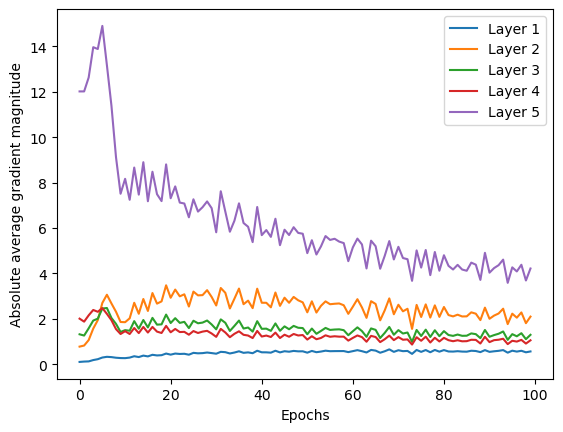

Accuracy: 0.6927255225522553


In [317]:
vals5layer = {'n_hidden_1':50, 'n_hidden_2':50, 'n_hidden_3':50, 'n_hidden_4':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn5layer = FiveLayerGlorotInitialize(**vals5layer)
nn5layer.fit(X_train3, y_train3, print_progress=1)
yhat5layer = nn5layer.predict(X_test3)
print('Accuracy:',accuracy_score(y_test3,yhat5layer))

Graphing loss function versus the number of epochs

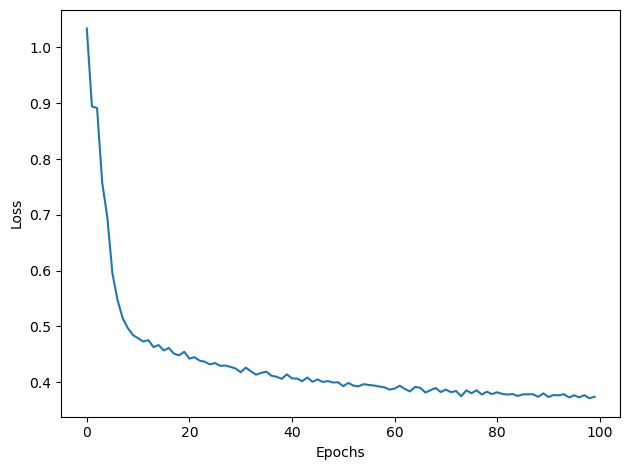

In [384]:
plt.plot(range(len(nn5layer.cost_)), nn5layer.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# 3.4 Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (choose either RMSProp or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

We will be implementing RMSProp as the adaptive learning technique in our five layer network

In [319]:
class AdaptiveFiveLayerPerceptronBase(object):
    def __init__(self, n_hidden_1=30, n_hidden_2=30, n_hidden_3=30, n_hidden_4=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.n_hidden_4 = n_hidden_4
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W

        """Initializing the weights for the second layer"""

        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) # reshape to be W

        """Initializing the weights for the third layer"""

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_hidden_3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden_3, self.n_hidden_2 + 1) # reshape to be W

        """Initializing the weights for the fourth layer"""

        W4_num_elems = (self.n_hidden_3 + 1)*self.n_hidden_4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden_4, self.n_hidden_3 + 1) # reshape to be W

        """Initializing the weights for the fifth layer"""

        W5_num_elems = (self.n_hidden_4 + 1)*self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden_4 + 1)

        return W1, W2, W3, W4, W5

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        """Including the mean of the new added third layer"""
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))

    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A6)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5) #notice the new function input referring to the new layer
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

In [320]:
class AdaptiveFiveLayerPerceptronVectorized(AdaptiveFiveLayerPerceptronBase):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)
        V4 = A5[1:, :] * (1 - A5[1:, :]) * (W5.T[1:, :] @ V5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW5 = V5 @ A5.T     #the gradient of the 5th layer
        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer


        # regularize weights that are not bias terms
        gradW5[:, 1:] += W5[:, 1:] * self.l2_C
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C


        return gradW1, gradW2, gradW3, gradW4, gradW5

In [321]:
class AdaptiveFiveLayerMiniBatch(AdaptiveFiveLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter = 10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Initialize weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        # Initialize RMSProp accumulators
        rho = 0.9  # Common choice for decay rate
        epsilon = 1e-8  # Small constant to prevent division by zero
        G_W1, G_W2, G_W3, G_W4, G_W5 = [np.zeros_like(w) for w in (self.W1, self.W2, self.W3, self.W4, self.W5)]

        # Incorporating momentum
        mu = 0.9  # Momentum rate
        V_W1, V_W2, V_W3, V_W4, V_W5 = [np.zeros_like(w) for w in (self.W1, self.W2, self.W3, self.W4, self.W5)]

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))

        if XY_test is not None:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test, self.predict(X_test))]
            self.val_cost_ = []

        for i in range(self.epochs):
            # Adaptive learning rate for each epoch
            eta = self.eta 
            
            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[idx], Y_enc[:, idx]

            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini_batches:
                # Feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5,
                                                      )
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost)

                # Compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)

                # Update RMSProp accumulators and adjust weights and biases
                for V, G, grad, W in zip((V_W1, V_W2, V_W3, V_W4, V_W5),
                                     (G_W1, G_W2, G_W3, G_W4, G_W5),
                                     (gradW1, gradW2, gradW3, gradW4, gradW5),
                                     (self.W1, self.W2, self.W3, self.W4, self.W5)):
                    G *= rho
                    G += (1 - rho) * grad ** 2
                    V = mu * V - (eta / np.sqrt(G + epsilon)) * grad  # Update with momentum
                    W += V


            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))

            if print_progress and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

        if print_progress:
            print()

        return self

In [322]:
class AdaptiveFiveLayerMiniBatchCrossEntropy(AdaptiveFiveLayerMiniBatch):
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6)+(1-Y_enc)*np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)
        V4 = A5[1:, :] * (1 - A5[1:, :]) * (W5.T[1:, :] @ V5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW5 = V5 @ A5.T     #the gradient of the 5th layer
        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer


        # regularize weights that are not bias terms
        gradW5[:, 1:] += W5[:, 1:] * self.l2_C
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C


        return gradW1, gradW2, gradW3, gradW4, gradW5

In [323]:
class AdaptiveFiveLayerGlorotInitialize(AdaptiveFiveLayerMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_3 + self.n_hidden_2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_3, self.n_hidden_2 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_4 + self.n_hidden_3))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_4, self.n_hidden_3 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_4))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_4 + 1))

        
        return W1, W2, W3, W4, W5

In [324]:
vals5layer = {'n_hidden_1':50, 'n_hidden_2':50, 'n_hidden_3':50, 'n_hidden_4':50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

adaptivenn5layer = AdaptiveFiveLayerGlorotInitialize(**vals5layer)
adaptivenn5layer.fit(X_train3, y_train3, print_progress=1)
adaptiveyhat5layer = adaptivenn5layer.predict(X_test3)
print('Accuracy:',accuracy_score(y_test3,adaptiveyhat5layer))

Epoch: 100/100


Accuracy: 0.7239411441144115


Graphing loss function versus the number of epochs

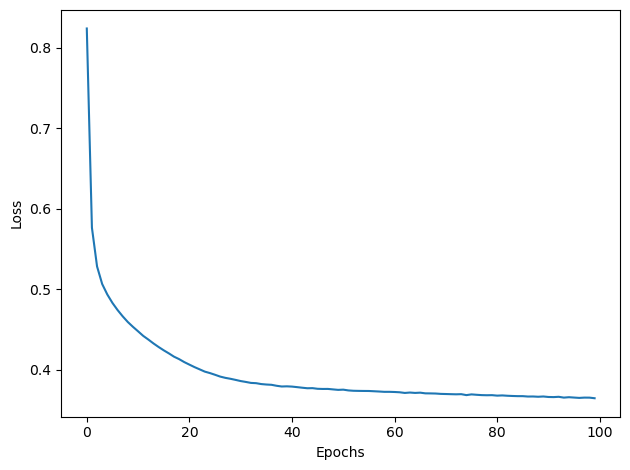

In [385]:
plt.plot(range(len(adaptivenn5layer.cost_)), adaptivenn5layer.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

Without the adaptive learning technique, our accuracy was 0.693. With the RMSProp adaptive learning technique, our accuracy was 0.723. From this, we can conclude that using adaptive learning resulted in a improvement in accuracy compared to the 5-layer perceptron model. RMSProp also has a better loss per epoch ratio compared to 5-layer

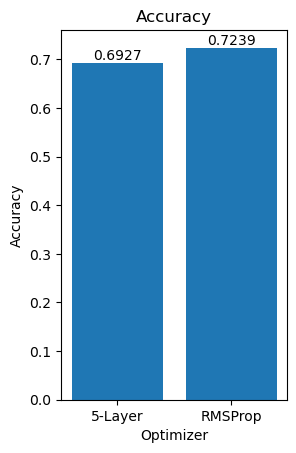

In [375]:
graph = plt.subplot(122)

yhat = nn5layer.predict(X_test3)
accuracy = accuracy_score(y_test3,yhat)

yhat_RMSProp = adaptivenn5layer.predict(X_test3)
accuracy_RMSProp = accuracy_score(y_test3,yhat_RMSProp)


x = [1,2]
y = [accuracy,accuracy_RMSProp]
plt.bar(x,y)
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Accuracy')
graph.set_xticks(x)
graph.set_xticklabels(['5-Layer','RMSProp'])

for x, y in zip(x, y):
    plt.text(x, y, '%.4f'%y, ha='center', va='bottom')

plt.show()

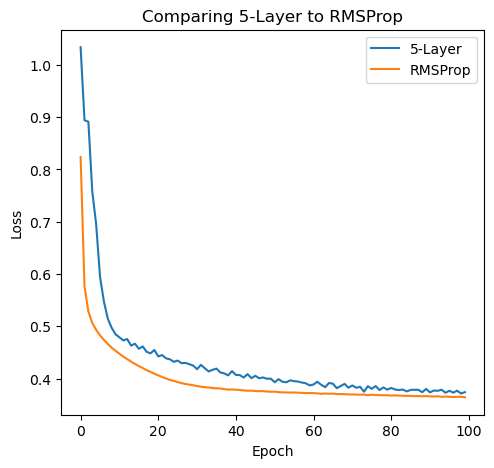

In [390]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)
plt.plot(range(len(nn5layer.cost_)), nn5layer.cost_)
plt.plot(range(len(adaptivenn5layer.cost_)), adaptivenn5layer.cost_)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparing 5-Layer to RMSProp')
plt.legend(['5-Layer','RMSProp'])

# Exceptional Work
Adding support for a 6th layer

In [326]:
class SixLayerPerceptronBase(object):
    def __init__(self, n_hidden_1=30, n_hidden_2=30, n_hidden_3=30, n_hidden_4=30, n_hidden_5=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_hidden_3 = n_hidden_3
        self.n_hidden_4 = n_hidden_4
        self.n_hidden_5 = n_hidden_5
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden_1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden_1, self.n_features_ + 1) # reshape to be W

        """Initializing the weights for the second layer"""

        W2_num_elems = (self.n_hidden_1 + 1)*self.n_hidden_2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden_2, self.n_hidden_1 + 1) # reshape to be W

        """Initializing the weights for the third layer"""

        W3_num_elems = (self.n_hidden_2 + 1)*self.n_hidden_3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden_3, self.n_hidden_2 + 1) # reshape to be W

        """Initializing the weights for the fourth layer"""

        W4_num_elems = (self.n_hidden_3 + 1)*self.n_hidden_4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden_4, self.n_hidden_3 + 1) # reshape to be W

        """Initializing the weights for the fifth layer"""

        W5_num_elems = (self.n_hidden_4 + 1)*self.n_hidden_5
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_hidden_5, self.n_hidden_4 + 1)

        """Initializing the weights for the sixth layer"""

        W6_num_elems = (self.n_hidden_5 + 1)*self.n_output_
        W6 = np.random.uniform(-1.0, 1.0, size=W6_num_elems)
        W6 = W6.reshape(self.n_output_, self.n_hidden_5 + 1)

        return W1, W2, W3, W4, W5, W6

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5, W6):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        """Including the mean of the new added third layer"""
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2)+ np.mean(W6[:, 1:] ** 2))

    def _cost(self,A7,Y_enc,W1,W2,W3,W4,W5, W6):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A7)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5, W6) #notice the new function input referring to the new layer
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5, W6):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """

        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        A6 = self._sigmoid(Z5)
        A6 = self._add_bias_unit(A6, how='row')
        Z6 = W6 @ A6
        A7 = self._sigmoid(Z6)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6, Z6, A7


    def _get_gradient(self, A1, A2, A3, A4, A5, A6, A7, Z1, Z2, Z3, Z4, Z5, Z6, Y_enc, W1, W2, W3, W4, W5, W6):
        """ Compute gradient step using backpropagation.
        """

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, _, _, A7 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.W6)
        y_pred = np.argmax(A7, axis=0)
        return y_pred

In [327]:
class SixLayerPerceptronVectorized(SixLayerPerceptronBase):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, A7, Z1, Z2, Z3, Z4, Z5, Z6, Y_enc, W1, W2, W3, W4, W5, W6):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V6 = -2*(Y_enc-A7)*A7*(1-A7)
        V5 = A6[1:, :] * (1 - A6[1:, :]) * (W6.T[1:, :] @ V6)
        V4 = A5[1:, :] * (1 - A5[1:, :]) * (W5.T[1:, :] @ V5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW6 = V6 @ A6.T     #the gradient of the 6th layer
        gradW5 = V5 @ A5.T     #the gradient of the 5th layer
        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer


        # regularize weights that are not bias terms
        gradW6[:, 1:] += W6[:, 1:] * self.l2_C
        gradW5[:, 1:] += W5[:, 1:] * self.l2_C
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradW6

In [328]:
class SixLayerMiniBatch(SixLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.1,
                 decrease_iter=10, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        super().__init__(**kwds)

        # Initialize gradient storage as a dictionary for each layer
        self.gradient_storage = {'W1': [], 'W2': [], 'W3': [], 'W4': [], 'W5': [], 'W6': []}

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data with mini-batch """
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.W6 = self._initialize_weights()

        # Initializing containers for the average gradient for each epoch
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
        self.grad_w6_ = np.zeros(self.epochs)
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum
        rho_W6_prev = np.zeros(self.W6.shape) # for momentum

        self.cost_ = []
        self.score_ = [accuracy_score(y_data, self.predict(X_data))]
        
        # Validation setup
        if XY_test is not None:
            X_test, y_test = XY_test
            self.val_score_ = [accuracy_score(y_test, self.predict(X_test))]
            self.val_cost_ = []

        for i in range(self.epochs):
            eta = self.eta 

            if print_progress > 0 and (i + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (i + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                # Feedforward 
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6, Z6, A7 = self._feedforward(X_data[idx],
                                                                    self.W1,
                                                                    self.W2,
                                                                    self.W3,
                                                                    self.W4,
                                                                    self.W5,
                                                                    self.W6,
                                                                    )

                cost = self._cost(A7, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.W6)
                mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5, gradW6 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, A7=A7, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, Z6=Z6,
                    Y_enc=Y_enc[:, idx],
                    W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5, W6=self.W6)

                # Store the absolute mean of the gradients in the dictionary
                self.gradient_storage['W1'].append(np.abs(gradW1).mean())
                self.gradient_storage['W2'].append(np.abs(gradW2).mean())
                self.gradient_storage['W3'].append(np.abs(gradW3).mean())
                self.gradient_storage['W4'].append(np.abs(gradW4).mean())
                self.gradient_storage['W5'].append(np.abs(gradW5).mean())
                self.gradient_storage['W6'].append(np.abs(gradW6).mean())

                # Weight updatess
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5, rho_W6 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5, eta * gradW6
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum
                self.W6 -= (rho_W6 + (self.alpha * rho_W6_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev, rho_W6_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5, rho_W6

            # After processing all mini-batches for the epoch, calculate the mean absolute gradient for each layer
            self.grad_w1_[i] = np.mean(self.gradient_storage['W1'][-len(mini):])
            self.grad_w2_[i] = np.mean(self.gradient_storage['W2'][-len(mini):])
            self.grad_w3_[i] = np.mean(self.gradient_storage['W3'][-len(mini):])
            self.grad_w4_[i] = np.mean(self.gradient_storage['W4'][-len(mini):])
            self.grad_w5_[i] = np.mean(self.gradient_storage['W5'][-len(mini):])
            self.grad_w6_[i] = np.mean(self.gradient_storage['W6'][-len(mini):])

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test, yhat))

        # Plotting the average gradient magnitude for each epoch - plot using the updated storage method
        plt.subplot(1, 1, 1)
        plt.plot(self.grad_w1_, label='Layer 1')
        plt.plot(self.grad_w2_, label='Layer 2')
        plt.plot(self.grad_w3_, label='Layer 3')
        plt.plot(self.grad_w4_, label='Layer 4')
        plt.plot(self.grad_w5_, label='Layer 5')
        plt.plot(self.grad_w6_, label='Layer 6')
        plt.legend()
        plt.ylabel('Average gradient magnitude')
        plt.xlabel('Epochs')
        plt.show()

        return self


In [329]:
class SixLayerMiniBatchCrossEntropy(SixLayerMiniBatch):
    def _cost(self,A7,Y_enc,W1,W2,W3,W4,W5, W6):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A7)+(1-Y_enc)*np.log(1-A7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5, W6)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, A7, Z1, Z2, Z3, Z4, Z5, Z6, Y_enc, W1, W2, W3, W4, W5, W6):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V6 = -2*(Y_enc-A7)*A7*(1-A7)
        V5 = A6[1:, :] * (1 - A6[1:, :]) * (W6.T[1:, :] @ V6)
        V4 = A5[1:, :] * (1 - A5[1:, :]) * (W5.T[1:, :] @ V5)
        V3 = A4[1:, :] * (1 - A4[1:, :]) * (W4.T[1:, :] @ V4)
        V2 = A3[1:, :] * (1 - A3[1:, :]) * (W3.T[1:, :] @ V3)
        V1 = A2[1:, :] * (1 - A2[1:, :]) * (W2.T[1:, :] @ V2)

        gradW6 = V6 @ A6.T     #the gradient of the 6th layer
        gradW5 = V5 @ A5.T     #the gradient of the 5th layer
        gradW4 = V4 @ A4.T     #the gradient of the 4th layer
        gradW3 = V3 @ A3.T     #the gradient of the 3rd layer
        gradW2 = V2 @ A2.T     #the gradient of the 2nd layer
        gradW1 = V1 @ A1.T     #the gradient of the 1st layer


        # regularize weights that are not bias terms
        gradW6[:, 1:] += W6[:, 1:] * self.l2_C
        gradW5[:, 1:] += W5[:, 1:] * self.l2_C
        gradW4[:, 1:] += W4[:, 1:] * self.l2_C
        gradW3[:, 1:] += W3[:, 1:] * self.l2_C
        gradW2[:, 1:] += W2[:, 1:] * self.l2_C
        gradW1[:, 1:] += W1[:, 1:] * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradW6

In [330]:
class SixLayerGlorotInitialize(SixLayerMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden_1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_1, self.n_features_ + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_2 + self.n_hidden_1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_2, self.n_hidden_1 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_3 + self.n_hidden_2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_3, self.n_hidden_2 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_hidden_4 + self.n_hidden_3))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_4, self.n_hidden_3 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_4))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_hidden_5, self.n_hidden_4 + 1))

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden_5))
        W6 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden_5 + 1))  
        
        return W1, W2, W3, W4, W5, W6

Epoch: 100/100

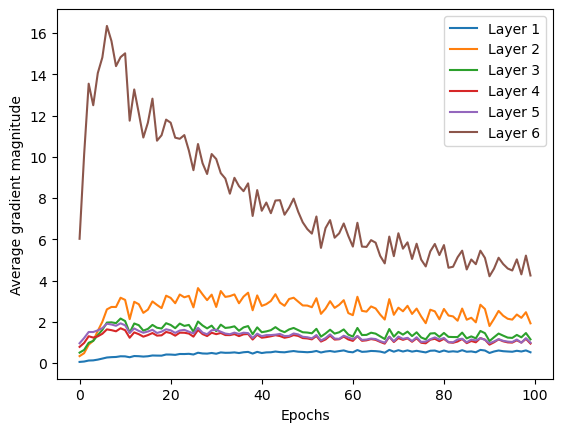

Accuracy: 0.6801430143014301


In [331]:
vals6layer = {'n_hidden_1':50, 'n_hidden_2':50, 'n_hidden_3':50, 'n_hidden_4':50, 'n_hidden_5': 50,
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'decrease_iter':20,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn6layer = SixLayerGlorotInitialize(**vals6layer)
nn6layer.fit(X_train3, y_train3, print_progress=1)
yhat6layer = nn6layer.predict(X_test3)
print('Accuracy:',accuracy_score(y_test3,yhat6layer))

Graphing loss function versus the number of epochs

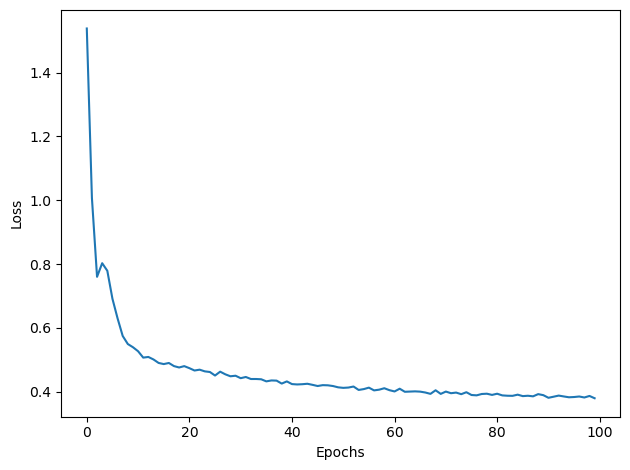

In [387]:
plt.plot(range(len(nn6layer.cost_)), nn6layer.cost_)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

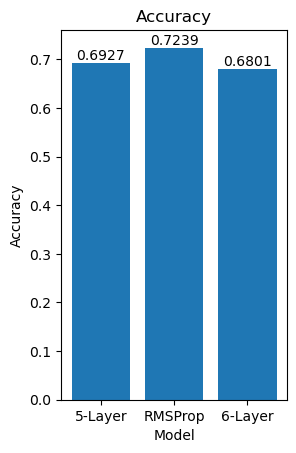

In [391]:
graph = plt.subplot(122)

yhat = nn5layer.predict(X_test3)
accuracy = accuracy_score(y_test3,yhat)

yhat_RMSProp = adaptivenn5layer.predict(X_test3)
accuracy_RMSProp = accuracy_score(y_test3,yhat_RMSProp)

yhat_6 = nn6layer.predict(X_test3)
accuracy_6layer = accuracy_score(y_test3,yhat_6)

x = [1,2,3]
y = [accuracy,accuracy_RMSProp, accuracy_6layer]
plt.bar(x,y)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy')
graph.set_xticks(x)
graph.set_xticklabels(['5-Layer','RMSProp','6-Layer'])

for x, y in zip(x, y):
    plt.text(x, y, '%.4f'%y, ha='center', va='bottom')

plt.show()

From the accuracy graph above, we can see that the using the RMSProp as the adaptive learning technique has the highest accuracy out of all three models, while 6-layer has the least accuracy though not by too much compared to the second highest accuracy, which was the 5-layer model.

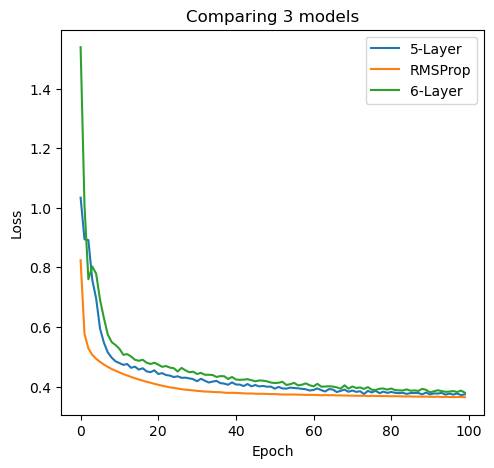

In [389]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)
plt.plot(range(len(nn5layer.cost_)), nn5layer.cost_)
plt.plot(range(len(adaptivenn5layer.cost_)), adaptivenn5layer.cost_)
plt.plot(range(len(nn6layer.cost_)), nn6layer.cost_)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparing 3 models')
plt.legend(['5-Layer','RMSProp','6-Layer'])

Additionally, RMSProp seems to be have a much better loss versus epoch ratio compared to both the 5-layer and 6-layer perceptron, with the 6-layer having the worst loss versus epoch ratio. This may be because adding in another layer leads to more complexity, and thus more loss.

We can conclude that RMSProp is the most efficient when it comes to both loss and maintaining high accuracy because it not only had the highest accuracy out of all three models, but also the lowest loss versus epoch ratio out of all three.

# References
1. https://github.com/eclarson/MachineLearningNotebooks/blob/master/07.%20MLP%20Neural%20Networks.ipynb
2. https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
3. https://mmuratarat.github.io/2019-02-25/xavier-glorot-he-weight-init